In [1]:
# %matplotlib inline
%time from hikyuu.interactive import *
from hikyuu_plugin.extra import * 

2025-11-24 16:14:59,886 [INFO] runing in interactive session [<module>] (F:\anaconda\envs\hikyuu_hub\Lib\site-packages\hikyuu\__init__.py:131) [hikyuu::hku_info]
2025-11-24 16:14:59,886 [INFO] running in jupyter [<module>] (F:\anaconda\envs\hikyuu_hub\Lib\site-packages\hikyuu\__init__.py:138) [hikyuu::hku_info]


2025-11-24 16:14:59.942 [HKU-I] - Plugin path: F:\anaconda\envs\hikyuu_hub\Lib\site-packages\hikyuu_plugin (StockManager.cpp:113)
2025-11-24 16:15:05.142 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:57)
2025-11-24 16:15:05.330 [HKU-I] - 加载市场信息…… (StockManager.cpp:704)
2025-11-24 16:15:05.334 [HKU-I] - 加载证券类型信息…… (StockManager.cpp:722)
2025-11-24 16:15:05.337 [HKU-I] - 加载证券信息…… (StockManager.cpp:602)
2025-11-24 16:15:05.481 [HKU-I] - 加载权息数据…… (StockManager.cpp:740)
2025-11-24 16:15:05.736 [HKU-I] - 加载板块信息…… (StockManager.cpp:182)
2025-11-24 16:15:07.106 [HKU-I] - 加载K线数据…… (StockManager.cpp:186)
2025-11-24 16:15:07.107 [HKU-I] - 预加载 day K线数据至缓存 (最大数量: 100000)! (StockManager.cpp:231)
2025-11-24 16:15:07.108 [HKU-I] - 1.82 秒数据加载完毕. (StockManager.cpp:193)
CPU times: total: 3.45 s
Wall time: 10.5 s


In [12]:
import sys
import os

# 获取当前 Notebook 的目录
notebook_dir = os.getcwd()

# 假设项目根目录是 Notebook 所在目录的上一级
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))

# 将项目根目录添加到 sys.path
if project_root not in sys.path:
    sys.path.append(project_root)

# 现在可以导入 src 目录下的模块
from tdx import extdata_util

KData{
  size : 3424
  stock: Stock(SH, 880001, 通达信总市值, 指数, 1, 2011-10-19 00:00:00, +infinity),
  query: KQuery(-3785, 9223372036854775807, INDEX, DAY, NO_RECOVER)
  first: KRecord(Datetime(20111019000000), 2334.8700, 2346.7400, 2318.8900, 2322.4600, 9995234.5000, 942969.0000)
  last: KRecord(Datetime(20251124000000), 10339.4210, 10375.8410, 10257.9610, 10334.5610, 174035972.9000, 12000783.0000)
}


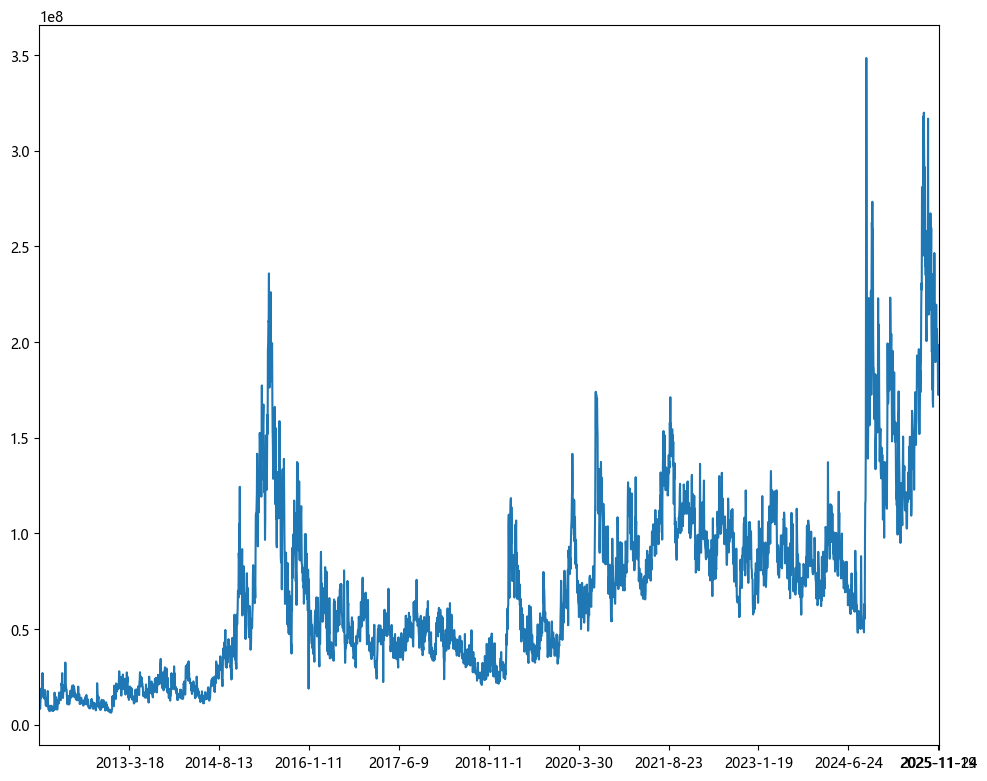

In [16]:
s = sm['sh880001']
q = Query(-3785)
k = s.get_kdata(q)
print(k)
AMO(k).plot()
# total_amo_ind = AMO(k)

5452
--------------
Indicator{
  name: INSUM
  size: 200
  discard: 0
  result sets: 1
  params: params[block(Block): Block(, ), fill_null(bool): 1, ignore_context(bool): 0, kdata(KData): Null, market(string): SH, mode(int): 0, query(Query): KQuery(-200, 9223372036854775807, INDEX, DAY, NO_RECOVER), ]
  support indicator param: False
  formula: INSUM(AMO)
  values0: [1.22823e+08, 1.12327e+08, 1.29622e+08, ..., 1.72043e+08, 1.98098e+08, 1.73811e+08]
}


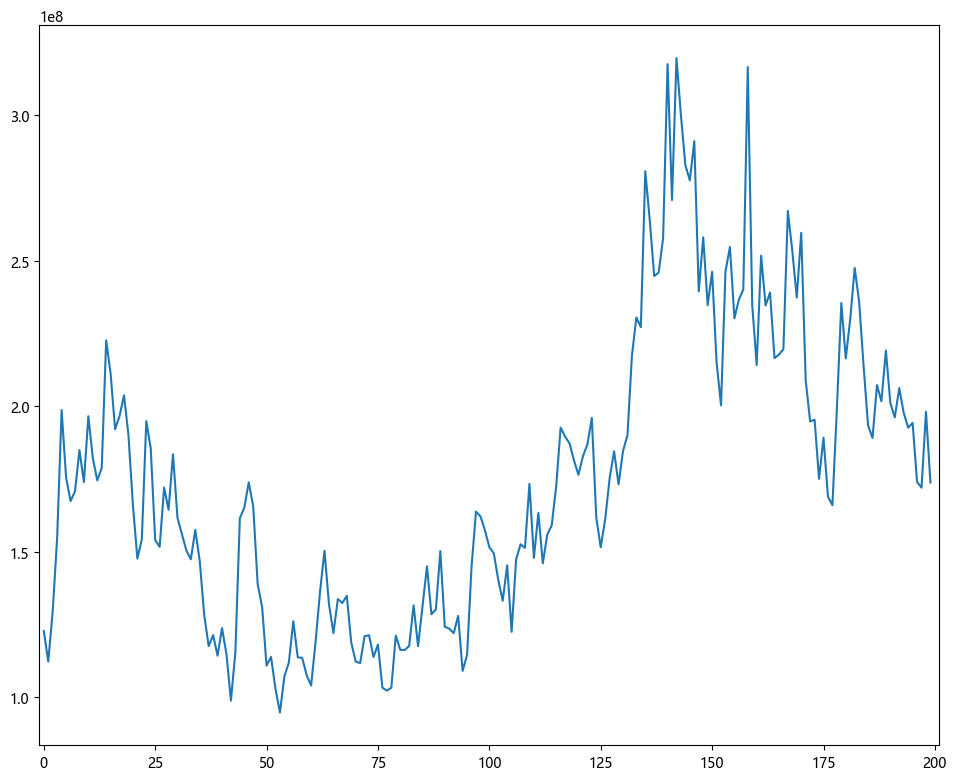

In [4]:
# 衡量市场微观结构恶化的指标，即成交额排名前5%的个股的成交额占全部A股占比创下历史极值，
# 接近50%，预示着结构恶化，市场行情进入预警区域，或见顶，或风格发生转换

# 获取K线数据

def stock_filter(stk: Stock):

    # 上市一年以上
    # ipc_1year = (stk.start_datetime + Days(365) < Datetime.today())
    # start_0 = stk.code.startswith('000')
    not_st = 'ST' not in stk.name
    # 所属市场如下
    return (
        # ipc_1year and 
            # start_0 and
            # not_st and
            (stk.type == constant.STOCKTYPE_A or
            stk.type == constant.STOCKTYPE_GEM or
            stk.type == constant.STOCKTYPE_START or
            stk.type == constant.STOCKTYPE_A_BJ))

stk_list = sm.get_stock_list(stock_filter)

print(len(stk_list))
q = Query(-200)
# print(stk_list[:int(len(stk_list) * 5 / 100)])
print('--------------')
volume_ind = INSUM(stk_list, q, ind=AMO, mode=0)
# print(stk_list[:int(len(stk_list) * 5 / 100)])
print(volume_ind)
volume_ind.plot()

In [150]:
q = Query(Datetime(201306040000), Datetime(202510010000))
print(q)
cal = sm.get_trading_calendar(q)
print(len(cal))

kdata = sm['sz300274'].get_kdata(Query(-10))
print(kdata)


KQueryByDate(2013-06-04 00:00:00, 2025-10-01 00:00:00, DATE, DAY, NO_RECOVER)
3000
KData{
  size : 10
  stock: Stock(SZ, 300274, 阳光电源, 创业板, 1, 2011-11-02 00:00:00, +infinity),
  query: KQuery(-10, 9223372036854775807, INDEX, DAY, NO_RECOVER)
  first: KRecord(Datetime(20251110000000), 203.2000, 205.0000, 189.3900, 194.0000, 1756273.9000, 902088.0000)
  last: KRecord(Datetime(20251121000000), 170.0200, 174.2500, 167.5100, 167.8900, 1175590.3000, 690452.0000)
}


In [21]:
q = Query(-500)
# q = Query(Datetime(201306040000), Datetime(202510010000))
percent = 5
cal = sm.get_trading_calendar(q)
df = pd.DataFrame()
for dtime in cal:
    ind_view_df = get_inds_view(stk_list, [AMO], dtime)
    # print(ind_view_df.head())
    # 计算前5
    sorted_df = ind_view_df.sort_values('AMO', ascending=False).reset_index(drop=True)
    # 计算需要取的行数
    count = max(1, int(len(sorted_df) * percent / 100))
    # 取前N%的数据
    top_data = sorted_df.head(count)
    
    # 计算成交金额总和
    top_percent_sum = top_data['AMO'].sum()

    # print(str(count) + '  -  ' + str(dtime) + '  -  ' + str(top_percent_sum))
    # print(top_data.head(10))
    new_data = {
        'datetime': [dtime.datetime()],
        'AMO': [top_percent_sum]
    }

    new_df = pd.DataFrame(new_data)
    df = pd.concat([df, new_df], ignore_index=True)
    
print(df)
amo_sum_ind = df_to_ind(df, col_name='AMO', col_date='datetime')
print(amo_sum_ind)

s = sm['sh880001']
k = s.get_kdata(q)
amo_a_total_ind = AMO(k)

amo_crowd_ind = amo_sum_ind / amo_a_total_ind
# print(amo_crowd_ind)
# amo_crowd_ind.plot()

cal_df = cal.to_df()
amo_df = amo_sum_ind.to_df()



261  -  2023-11-01 00:00:00  -  32051139.800000004
   证券代码  证券名称   交易时间        AMO
0  SH600519  贵州茅台 2023-11-01  1674729.3
1  SZ002641  公元股份 2023-11-01   762290.3
2  SZ002476  宝莫股份 2023-11-01   644807.7
3  SH600418  江淮汽车 2023-11-01   526742.6
4  SH603776    永安行 2023-11-01   445777.0
5  SZ300750  宁德时代 2023-11-01   369512.0
6  SH600819  耀皮玻璃 2023-11-01   365369.2
7  SZ000568  泸州老窖 2023-11-01   312631.2
8  SZ000977  浪潮信息 2023-11-01   285831.0
9  SZ300735  光弘科技 2023-11-01   278080.8
261  -  2023-11-02 00:00:00  -  29930953.800000004
   证券代码  证券名称   交易时间       AMO
0  SH601127    赛力斯 2023-11-02  977009.2
1  SH600519  贵州茅台 2023-11-02  498209.1
2  BJ920392  佳合科技 2023-11-02  408498.4
3  SH601012  隆基绿能 2023-11-02  403272.1
4  SH600418  江淮汽车 2023-11-02  395719.1
5  SZ002456    欧菲光 2023-11-02  391635.3
6  SZ300735  光弘科技 2023-11-02  364217.2
7  SZ300903  科翔股份 2023-11-02  280601.0
8  SH600839  四川长虹 2023-11-02  270415.3
9  SZ300613    富瀚微 2023-11-02  262333.4
261  -  2023-11-03 00:00:00  -  30438048.

In [24]:
# 关键步骤：按列合并（横向合并），使 datetime 和 AMO 成为两列
# 前提：两个 DataFrame 的行数一样，且顺序一一对应
amo_a_total_df = amo_a_total_ind.to_df().rename(columns={'value0': 'AMO_A'})

result_df = pd.concat([amo_df, amo_a_total_df], axis=1).rename(columns={'value0': 'AMO'})
# print(result_df)
result_df['date_int'] = df['datetime'].dt.strftime('%Y%m%d').astype(int)
result_df['value_f'] = result_df['AMO'] / result_df['AMO_A']
# result_df = result_df.rename(columns={'AMO': 'value_f'})
print(result_df)
extdata_util.generate_file_dat(result_df,"C:\\hwx\\T0002\\extdata\\extdata_82.dat")

2025-11-23 21:07:19,437 [INFO] 生成DAT文件，数据行数: 500 [tdx.extdata_util::generate_file_dat]
2025-11-23 21:07:19,462 [INFO] 成功写入数据到文件: C:\hwx\T0002\extdata\extdata_82.dat [tdx.extdata_util::write_binary_data]


      datetime         AMO   datetime        AMO_A  date_int   value_f
0   2023-11-01  32051139.8 2023-11-01   81344443.2  20231101  0.394018
1   2023-11-02  29930953.8 2023-11-02   76815794.2  20231102  0.389646
2   2023-11-03  30438048.5 2023-11-03   81110342.0  20231103  0.375267
3   2023-11-06  40628961.3 2023-11-06  106588012.5  20231106  0.381178
4   2023-11-07  39928924.5 2023-11-07   99487711.2  20231107  0.401345
..         ...         ...        ...          ...       ...       ...
495 2025-11-17  76423142.3 2025-11-17  193033876.3  20251117  0.395905
496 2025-11-18  80718710.2 2025-11-18  194596752.6  20251118  0.414800
497 2025-11-19  70917526.2 2025-11-19  174267682.0  20251119  0.406946
498 2025-11-20  72926779.2 2025-11-20  172263735.3  20251120  0.423344
499 2025-11-21  78153420.5 2025-11-21  198360157.4  20251121  0.393998

[500 rows x 6 columns]


True

In [5]:
q = Query(Datetime(201306040000), Datetime(202510010000))
cal = sm.get_trading_calendar(q)
cal_df = cal.to_df()
print(cal_df.head(10))

    datetime
0 2013-06-04
1 2013-06-05
2 2013-06-06
3 2013-06-07
4 2013-06-13
5 2013-06-14
6 2013-06-17
7 2013-06-18
8 2013-06-19
9 2013-06-20


2025-11-24 17:06:27,755 [INFO] 生成DAT文件，数据行数: 1000 [tdx.extdata_util::generate_file_dat]
2025-11-24 17:06:27,840 [INFO] 成功写入数据到文件: C:\hwx\T0002\extdata\extdata_182.dat [tdx.extdata_util::write_binary_data]


True

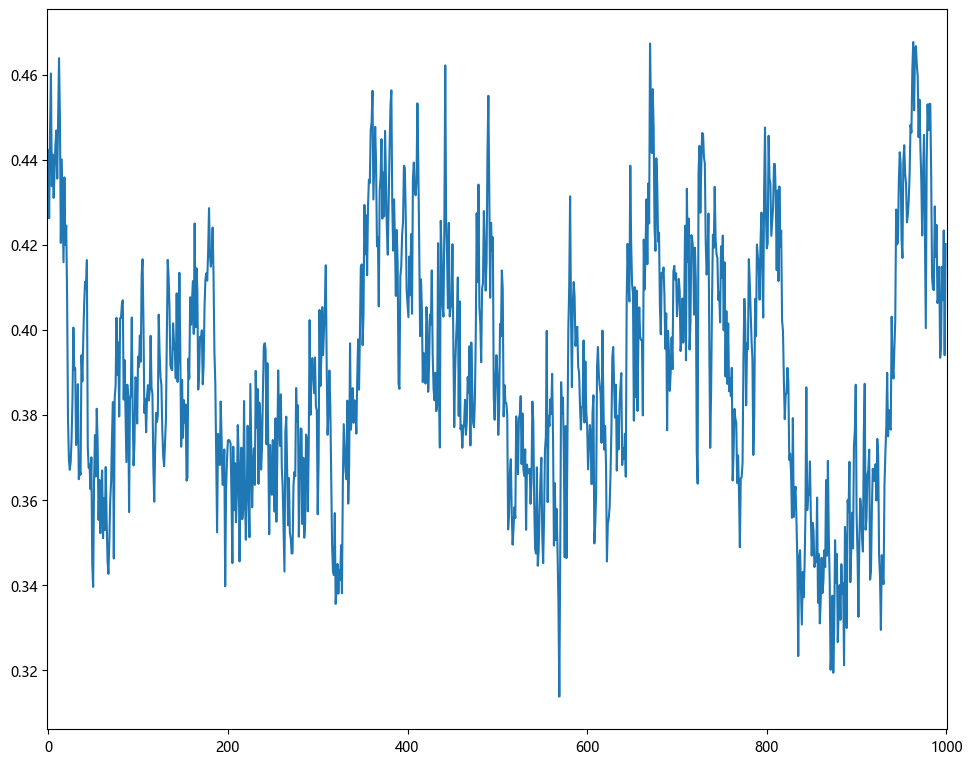

In [18]:
percent = 5
q = Query(-1000)
# q = Query(Datetime(201801010000), Datetime(202010010000))
# q = Query(Datetime(201306040000), Datetime(202510010000))
cal = sm.get_trading_calendar(q)
df = pd.DataFrame()
for dtime in cal:
    ind_view_df = get_inds_view(stk_list, [AMO], dtime)
    # print(ind_view_df.head())
    # 计算前5
    sorted_df = ind_view_df.sort_values('AMO', ascending=False).reset_index(drop=True)
    # 计算需要取的行数
    count = max(1, int(len(sorted_df) * percent / 100))
    # 取前N%的数据
    top_data = sorted_df.head(count)
    
    # 计算成交金额总和
    top_percent_sum = top_data['AMO'].sum()

    # print(str(count) + '  -  ' + str(dtime) + '  -  ' + str(top_percent_sum))
    # print(top_data.head(10))
    new_data = {
        'datetime': [dtime.datetime()],
        'AMO': [top_percent_sum]
    }

    new_df = pd.DataFrame(new_data)
    df = pd.concat([df, new_df], ignore_index=True)
    
# print(df)
amo_sum_ind = df_to_ind(df, col_name='AMO', col_date='datetime')
# print(amo_sum_ind)

s = sm['sh880001']
k = s.get_kdata(q)
amo_a_total_ind = AMO(k)

amo_crowd_ind = amo_sum_ind / amo_a_total_ind
# print(amo_crowd_ind)
amo_crowd_ind.plot()

cal_df = cal.to_df()
amo_df = amo_sum_ind.to_df()

# 关键步骤：按列合并（横向合并），使 datetime 和 AMO 成为两列
# 前提：两个 DataFrame 的行数一样，且顺序一一对应
amo_a_total_df = amo_a_total_ind.to_df().rename(columns={'value0': 'AMO_A'})

result_df = pd.concat([amo_df, amo_a_total_df], axis=1).rename(columns={'value0': 'AMO'})
# print(result_df)
result_df['date_int'] = df['datetime'].dt.strftime('%Y%m%d').astype(int)
result_df['value_f'] = result_df['AMO'] / result_df['AMO_A']
# result_df = result_df.rename(columns={'AMO': 'value_f'})
# print(result_df)
result_df.to_csv("C:\\hwx\\T0002\\extdata\\extdata_182.csv")
extdata_util.generate_file_dat(result_df,"C:\\hwx\\T0002\\extdata\\extdata_182.dat")

In [19]:
df = extdata_util.parse_file_idx("C:\\hwx\\T0002\\extdata\\extdata_182.idx")
print(df)

[{'i': 0, 'market_code': 1, 'stock_code': '999999', 'record_count': 3785}]
